# CDD - Lab2

EDA: Distribuições, correlações.

## Instruções

Individual, em dupla ou em grupos de 3 alunos.

Quando for feito por mais de um aluno:

*   Todos enviam uma cópia idêntica; OU
*   Um aluno envia uma cópia completa e os demais enviam uma cópia vazia, indicando apenas o grupo e onde está a solução (informe isso na próxima célula).

**Implementações Extras.**
Implemente apenas o que é pedido (a quantidade de gráficos, por exemplo). Caso queria implementar algo mais, deixe separado no final do notebook (existe uma seção de rascunho já criada para isso).

**Implementação em duas etapas.** Parte A: do início até antes de "correlação".  Parte B: correlação será implementada apenas na próxima semana, após a aula sobre o assunto.




# Parte A

## Preencher:

**Aluno(as):**

Augusto Gomes dos Santos

Gabriel Paiva Medeiros

Wander Medeiros de Brito Junior


**Forma de Envio (escolha uma das linhas a seguir e apague as demais):**.

Todos enviaremos cópias completas / idênticas.


## Datsets

1. Rain in Australia

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv

2. Student Food Survey

https://www.kaggle.com/mlomuscio/student-food-survey

3. Students Performance in Exams

https://www.kaggle.com/spscientist/students-performance-in-exams

### Informe aqui o datset escolhido:

2


## Imports

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando o dataset

In [ ]:
df = pd.read_csv('Food Survey - Data.csv')

## Inspeção Inicial dos Dados, Pré-processamento, limpeza, transformações, etc

Fique à vontade para criar descrições aninhadas aqui. Para ficarem aninhados, use títulos markdown de 3o nível (###) em diante.

### Data

In [ ]:
df

,Timestamp,Gender,Boarding,Grade,Athlete,Activities,DHBreakfast,NDHBreakfast,BClass,DHBoxes,NDHBoxes,NDHMeals,Nutrition,Money
0,10/22/2020 11:36:55,Female,Day,12th,No,None of the above,0,2,No,2.0,0.0,0,0.0,40.0
1,10/22/2020 11:36:58,Male,Boarding,10th,Yes,Soccer,5,2,No,2.0,0.0,5,4.0,15.0
2,10/22/2020 11:36:59,Female,Day,9th,Yes,Tennis,3,7,Yes,2.0,0.0,10,4.0,50.0
3,10/22/2020 11:37:00,Male,Day,11th,No,None of the above,0,4,No,2.0,0.0,1,2.0,4.0
4,10/22/2020 11:37:01,Female,Day,12th,No,Musical,0,5,Yes,1.0,0.0,2,3.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,10/23/2020 10:39:15,Male,Boarding,12th,No,None of the above,2,0,Yes,2.0,1.0,5,1.0,25.0
163,10/23/2020 12:34:25,Female,Day,11th,No,None of the above,0,7,No,2.0,0.0,0,3.0,0.0
164,10/23/2020 22:51:15,Male,Day,9th,No,Cross Country,0,0,No,0.0,0.0,0,0.0,1.0
165,10/24/2020 17:39:51,Female,Day,10th,No,Pre-season conditioning,0,2,Yes,1.0,0.0,0,4.0,0.0


In [ ]:
df.describe()

,DHBreakfast,NDHBreakfast,DHBoxes,NDHBoxes,NDHMeals,Nutrition,Money
count,167.000000,167.000000,165.000000,164.000000,167.000000,166.000000,141.000000
mean,3.179641,2.562874,2.387879,0.615854,3.101796,2.746988,17.425532
std,2.764459,2.696595,1.395060,1.153280,2.932236,1.598055,15.648475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.500000,2.000000,5.000000
50%,2.000000,2.000000,2.000000,0.000000,2.000000,3.000000,15.000000
75%,6.000000,5.000000,3.000000,1.000000,5.000000,4.000000,25.000000
max,7.000000,7.000000,9.000000,10.000000,10.000000,5.000000,100.000000


### Remove NaN

In [ ]:
df.isnull().values.any(), df.isnull().sum().sum()

(True, 35)

In [ ]:
df = df.dropna()
df.isnull().values.any(), df.isnull().sum().sum()

(False, 0)

### Verify Invalid Data

In [ ]:
df[df['DHBreakfast'] < 0].shape

(0, 14)

In [ ]:
df[df['NDHBreakfast'] < 0].shape

(0, 14)

In [ ]:
df[df['NDHBoxes'] < 0].shape

(0, 14)

In [ ]:
df[df['NDHMeals'] < 0].shape

(0, 14)

In [ ]:
df[df['Nutrition'] < 0].shape

(0, 14)

In [ ]:
df[df['Money'] < 0].shape

(0, 14)

In [ ]:
np.unique(df.BClass)

array(['No', 'Yes'], dtype=object)

In [ ]:
np.unique(df.Activities)

array(['Cross Country', 'Football', 'Golf', 'Intramurals', 'Musical',
       'None of the above', 'Pre-season conditioning', 'Soccer', 'Tennis',
       'Volleyball'], dtype=object)

In [ ]:
np.unique(df.Athlete)

array(['No', 'Yes'], dtype=object)

In [ ]:
np.unique(df.Gender)

array(['Female', 'Male', 'Non-Binary'], dtype=object)

## Histogramas

**As análises daqui por diante podem ser do datset inteiro ou de um recorte deles (e.g, análise para uma determinada região, gênero, etc).**

Plote 2 a 5 histogramas que julgar interessantes. Uma boa escolha pode ser para situações onde a distribuição observada não está bem alinhada com o que você imaginou inicialmente. Nas células markdown que antedecem os gráficos, comente brevemente o que foi plotado/observado.



### Gender Histogram

#### No seguinte histograma observamos a quantidade de alunos por sexo. Interpretando o gráfico, observamos que a maioria dos alunos são homens.

In [ ]:
fig = px.histogram(df, x = "Gender")
fig.show()

### Athlete Histogram

#### No seguinte histograma observamos a quantidade de alunos que se consideram e não se consideram atletas. Observa-se que a maioria dos participantes se consideram atletas. 

In [ ]:
fig = px.histogram(df, x = "Athlete")
fig.show()

### Money Histogram

#### Histograma referente a quantidade de dinheiro gasto com comida por semana, em média, fora do refeitório.

In [ ]:
fig = px.histogram(df, x = "Money")
fig.show()

### Nutrition vs Athlete

#### Histograma que descreve o nível de conhecimento do participante em relação ao valor nutricional dos alimentos que ingere em uma escala de 0 a 5.

#### É possível perceber que os estudantes que se consideram atletas costumam ter um grau de conhecimento maior em relação aos que não se consideram. Tal fato é compreensível, dado que pessoas que não praticam atividades físicas e não seguem uma dieta costumam não se importar tanto com esses números.

In [ ]:
def plot_grouped_histogram(column_1, column_2, df, title):
  traces = []
  for v in np.unique(df[column_1]):
    x = df.loc[df[column_1] == v, column_2]
    trace = go.Histogram(
        x = x, name = v,
        opacity=0.75
    )
    traces.append(trace)
  layout = go.Layout(barmode = 'group')
  fig = go.Figure(data=traces, layout=layout)
  fig.update_layout(
    title = {
        'text' : '<b>' + title + '</b>',
        'x': 0.5,
        'xanchor': 'center'
    },
    yaxis_title=column_2
  )
  fig.show()

plot_grouped_histogram('Athlete', 'Nutrition', df, "Distribution of Athlete Based on Nutrition")

### Gender vs Nutrition

#### Através do histograma abaixo é possível perceber que a quantidade de homens que considera ter um grau de conhecimento acima de 3 do valor nutricional dos alumentos é quase o dobro em relação as mulheres.

In [ ]:
plot_grouped_histogram('Gender', 'Nutrition', df, "Distribution of Gender Based on Nutrition")

## Gráficos de dispersão, boxplots, violinplots

**As análises podem ser do datset inteiro ou de um recorte deles (e.g., análise para uma determinada região, gênero, etc).**

Plote 2 a 5 gráficos que julgar interessantes. 

Procure fazer comparações (colocar 2 ou mais boxplot lado a lado, por exemplo).

Procure usar algumas visualizações um pouco diferentes daquelas vistas em sala. Por exemplo. gráficos que misturam pontos com boxplot ou violinplots. Algumas sugestões estão em um capítulo de livro postado no classroom (do livro Fundamentals of Data Visualization, de Claus O. Wilke).

Procure identificar situações pouco esperadas / menos óbvias, pois, se conseguir, isso será um grande diferencial.

Deixe comentários em markdown nas células que entecedem os gráficos.



### Nutrition Violinplot

#### Através do Violinplot abaixo observamos que a maioria dos alunos consideram os valores 3 ou 4 para o valor nutricional dos alimentos ingeridos.

In [ ]:
fig = px.violin(df, y="Nutrition", box=True, points='all')
fig.show()

### ViolinPlot - Gender vs Nutrition - All Athletes
#### Através do Violinplot abaixo percebe-se que a maioria dos homens e das mulheres atletas consideram os valores 3 ou 4 para o valor nutricional dos alimentos ingeridos.

In [ ]:
new_df = df[df['Athlete'] == 'Yes']
fig = px.violin(df, y="Nutrition", points='all', color="Gender", violinmode='overlay')
fig.show()

### BoxPlot - Activities vs Boxes
#### Através dos Boxplots abaixo percebe-se que os praticantes de football, soccer e pre-season conditioning consomem mais caixas de comida.

In [ ]:
def plot_box_plot(df, column_1, column_2, title):
  
  n = len(np.unique(df[column_1])) 
  fig = make_subplots(rows=1, cols=n)

  fig.update_layout(
      title = {
          'text' : '<b>' + title + '</b>',
          'x': 0.5,
          'xanchor': 'center'
      },
      yaxis_title=column_2
  )
  
  col = 1
  for value in np.unique(df[column_1]):
    sub_df = df.loc[df[column_1] == value, column_2]
    fig.append_trace(go.Box(y = sub_df, name=value), row = 1, col = col)
    col += 1
  fig.show()

new_df = df[['Activities', 'DHBoxes', 'NDHBoxes']]
new_df['Boxes'] = new_df['DHBoxes'] + new_df['NDHBoxes']
new_df = new_df[new_df['Activities'] != 'None of the above']
plot_box_plot(new_df, 'Activities', 'Boxes', 'BoxPlot - Activities vs Boxes')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Scatter Plot - Money vs Boxes

#### Através do Scatterplot abaixo percebe-se que os alunos que gastam menos dinheiro fora do refeitório são os que mais consomem caixas de comida.

In [ ]:
new_df = df[['Money', 'DHBoxes', 'NDHBoxes']]
new_df['Boxes'] = new_df['DHBoxes'] + new_df['NDHBoxes']
fig = px.scatter(new_df, x="Money", y="Boxes")
fig.update_layout(
      title = {
          'text' : '<b>' + "Scatter Plot - Money vs Boxes" + '</b>',
          'x': 0.5,
          'xanchor': 'center'
      }
  )
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Box Plot - Grade vs Boxes

#### Através do boxplots abaixo percebe-se que a quantidade de caixas de comida consumidas pelos alunos de cada série são bem próximas uma das outras.

In [ ]:
new_df = df[['Grade', 'DHBoxes', 'NDHBoxes']]
new_df['Boxes'] = new_df['DHBoxes'] + new_df['NDHBoxes']
plot_box_plot(new_df, 'Grade', 'Boxes', 'BoxPlot - Grade vs Boxes')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Parte B

## Correlações

**As análises podem ser do datset inteiro ou de um recorte deles (e.g., análise para uma determinada região, gênero, etc).**

Procure por correlações nos dados e mostre os valores encontrados. Fique à vontade para plotar gráficos antes de calcular a correlação, caso ache útil.

Justifique a estratégia utilizada para calcular.

Basta mostrar de 2 a 5 situações investigadas.

Ao mostrar as correlações encontradas, comente se você achou ela relevante (se não é muito óbvia).

Deixe comentários em markdown nas células que entecedem os códigos / gráficos.



### Preparing Data

### Selecionando colunas com valores numéricos
### Criando uma nova coluna com a quantidade de caixas de comida consumida (Fora do refeitório + No refeitório)

In [ ]:
new_df = df.select_dtypes(include='number')
new_df['ALLBoxes'] = new_df['DHBoxes'] + new_df['NDHBoxes']
new_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DHBreakfast,NDHBreakfast,DHBoxes,NDHBoxes,NDHMeals,Nutrition,Money,ALLBoxes
0,0,2,2.0,0.0,0,0.0,40.0,2.0
1,5,2,2.0,0.0,5,4.0,15.0,2.0
2,3,7,2.0,0.0,10,4.0,50.0,2.0
3,0,4,2.0,0.0,1,2.0,4.0,2.0
4,0,5,1.0,0.0,2,3.0,20.0,1.0
...,...,...,...,...,...,...,...,...
162,2,0,2.0,1.0,5,1.0,25.0,3.0
163,0,7,2.0,0.0,0,3.0,0.0,2.0
164,0,0,0.0,0.0,0,0.0,1.0,0.0
165,0,2,1.0,0.0,0,4.0,0.0,1.0


### Describe Data

In [ ]:
new_df.describe()

,DHBreakfast,NDHBreakfast,DHBoxes,NDHBoxes,NDHMeals,Nutrition,Money,ALLBoxes
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,3.111111,2.311111,2.303704,0.525926,3.148148,2.696296,17.366667,2.829630
std,2.650448,2.564007,1.147834,0.799530,2.961238,1.598853,15.669535,1.632418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,5.000000,2.000000
50%,2.000000,1.000000,2.000000,0.000000,3.000000,3.000000,15.000000,2.000000
75%,6.000000,5.000000,3.000000,1.000000,5.000000,4.000000,25.000000,3.500000
max,7.000000,7.000000,6.000000,5.000000,10.000000,5.000000,100.000000,8.000000


### É perceptível que algumas variáveis estão em uma escala bem superior as outras. Logo, é interessante normalizar os dados

### Normalizing Data

In [ ]:
normalized_df = (new_df - new_df.min())/(new_df.max() - new_df.min())
normalized_df 

,DHBreakfast,NDHBreakfast,DHBoxes,NDHBoxes,NDHMeals,Nutrition,Money,ALLBoxes
0,0.000000,0.285714,0.333333,0.0,0.0,0.0,0.40,0.250
1,0.714286,0.285714,0.333333,0.0,0.5,0.8,0.15,0.250
2,0.428571,1.000000,0.333333,0.0,1.0,0.8,0.50,0.250
3,0.000000,0.571429,0.333333,0.0,0.1,0.4,0.04,0.250
4,0.000000,0.714286,0.166667,0.0,0.2,0.6,0.20,0.125
...,...,...,...,...,...,...,...,...
162,0.285714,0.000000,0.333333,0.2,0.5,0.2,0.25,0.375
163,0.000000,1.000000,0.333333,0.0,0.0,0.6,0.00,0.250
164,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.01,0.000
165,0.000000,0.285714,0.166667,0.0,0.0,0.8,0.00,0.125


### Covariance

In [ ]:
new_df.cov()

,DHBreakfast,NDHBreakfast,DHBoxes,NDHBoxes,NDHMeals,Nutrition,Money,ALLBoxes
DHBreakfast,7.024876e+00,-3.064677,0.794362,0.500829,1.692371,0.250415,-1.420030e-16,1.295191
NDHBreakfast,-3.064677e+00,6.574129,0.054063,-0.500663,-0.315091,0.833997,4.452239e+00,-0.446600
DHBoxes,7.943615e-01,0.054063,1.317523,0.354008,0.477059,0.473521,-3.383085e-02,1.671531
NDHBoxes,5.008292e-01,-0.500663,0.354008,0.639248,0.615533,0.093753,-1.448010e+00,0.993256
NDHMeals,1.692371e+00,-0.315091,0.477059,0.615533,8.768933,0.119956,7.587065e+00,1.092593
Nutrition,2.504146e-01,0.833997,0.473521,0.093753,0.119956,2.556329,-3.260945e+00,0.567275
Money,-1.420030e-16,4.452239,-0.033831,-1.448010,7.587065,-3.260945,2.455343e+02,-1.481841
ALLBoxes,1.295191e+00,-0.446600,1.671531,0.993256,1.092593,0.567275,-1.481841e+00,2.664787


### Correlation Matrix

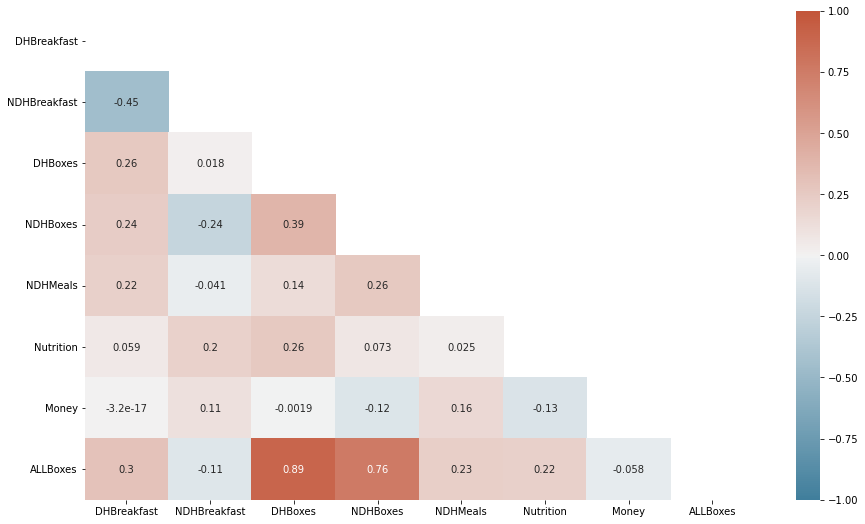

In [ ]:
corr = new_df.corr(method='pearson')
f, ax = plt.subplots(figsize=(15, 9))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap, vmin=-1,vmax=1)

### Diante dos dados acima, observa-se que não temos uma correlação alta entre nenhum par de colunas, exceto os seguintes pares:
- ALLBoxes e DHBoxes
- ALLBoxes e NDHBoxes

### Já era esperado que tais pares possuíssem uma correlação alta, visto que: ALLBoxes = DHBoxes + NDHBoxes


### Scatterplot - Matrix

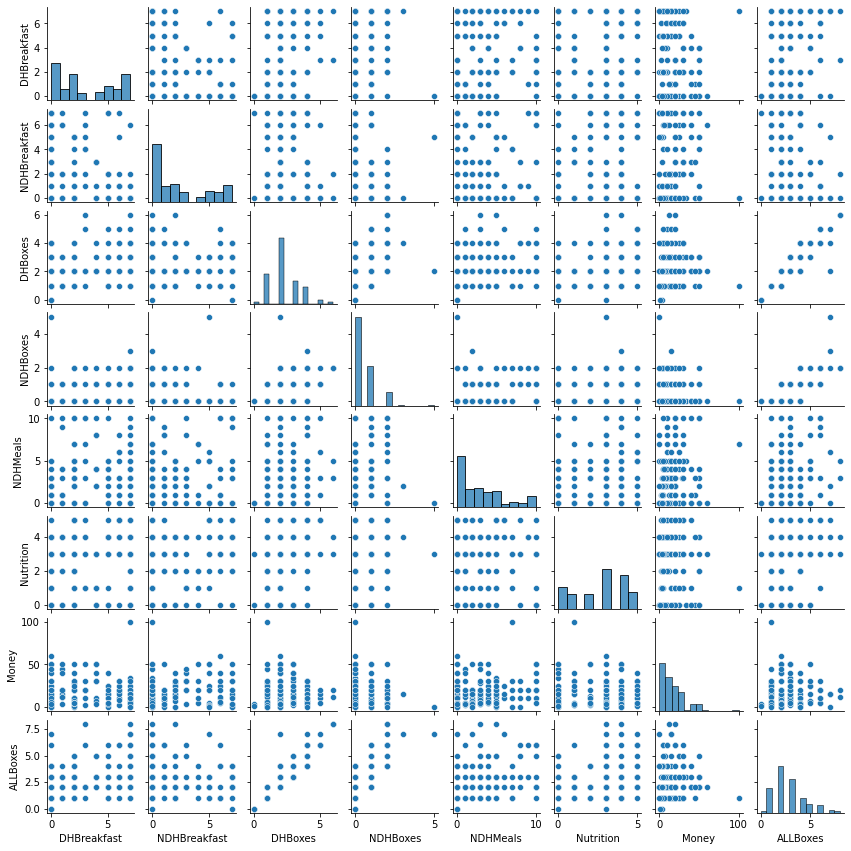

In [ ]:
sns.pairplot(new_df, height=1.5)

### Diante dos dados acima, confirmamos que a correlação entre as colunas não passam de 0.5, exceto: 
- ALLBoxes e DHBoxes
- ALLBoxes e NDHBoxes

# Implementações EXTRAS / RASCUNHO

Caso tenha implementado mais coisas do que foi pedido, coloque-as a partir deste ponto, para deixar a parte anterior mais limpa.

Fique totalmente à vontade para colocar qualquer coisa aqui, com ou sem comentários. É como o rascunho de uma prova... não será corrigido.

In [ ]:
#

In [ ]:
#